# 0. Khai báo các thư viện cần sử dụng

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# 1. Đọc file CSV

In [2]:
df = pd.read_csv("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2021/12/31011319/OnlineRetail.csv", encoding = "ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# 2. Kiểm tra dữ liệu bị khuyết

In [5]:
# Kiểm tra dữ liệu bị khuyết
df.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [6]:
# Kiểm tra dữ liệu không bị khuyết
df.CustomerID.notna()

0         True
1         True
2         True
3         True
4         True
          ... 
541904    True
541905    True
541906    True
541907    True
541908    True
Name: CustomerID, Length: 541909, dtype: bool

In [7]:
# In ra những dòng ngoại lai Quantity < 0
df[df.Quantity < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [8]:
# Xoá bỏ dòng ngoại lai của Quantity
df = df[df.Quantity >= 0]

In [9]:
# Xoá những dòng chứa giá trị bị khuyết
df1 = df.dropna()

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [11]:
# Xoá những dòng chứa toàn giá trị bị khuyết
df2 = df.dropna(how = "all")
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531285 non-null  object 
 1   StockCode    531285 non-null  object 
 2   Description  530693 non-null  object 
 3   Quantity     531285 non-null  int64  
 4   InvoiceDate  531285 non-null  object 
 5   UnitPrice    531285 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      531285 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


In [12]:
# Giữ những dòng có ít nhất 7 giá trị không bị khuyết thiếu
df3 = df.dropna(thresh = 7)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530693 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    530693 non-null  object 
 1   StockCode    530693 non-null  object 
 2   Description  530693 non-null  object 
 3   Quantity     530693 non-null  int64  
 4   InvoiceDate  530693 non-null  object 
 5   UnitPrice    530693 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      530693 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.4+ MB


In [13]:
# Xoá những hàng mà có giá trị bị khuyết trên cột "CustomerID"
df4 = df.dropna(subset = ["CustomerID"])
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


# 3. Thay thế dữ liệu bị khuyết

In [14]:
# Thay thế những giá trị bị khuyết trên cột CustomerID bằng giá trị -1
df5 = df
df5.CustomerID = df.CustomerID.fillna(-1)

In [15]:
# Hiển thị những dòng có CustomerID = -1 vừa được thay thế
df5[df5.CustomerID == -1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,-1.0,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,-1.0,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,-1.0,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,-1.0,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,-1.0,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,-1.0,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,-1.0,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,-1.0,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,-1.0,United Kingdom


In [16]:
# Thay thế các giá trị bị khuyết ở cột Country bằng giá trị trước đó
df5.Country = df.Country.fillna(method = "ffill")
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531285 non-null  object 
 1   StockCode    531285 non-null  object 
 2   Description  530693 non-null  object 
 3   Quantity     531285 non-null  int64  
 4   InvoiceDate  531285 non-null  object 
 5   UnitPrice    531285 non-null  float64
 6   CustomerID   531285 non-null  float64
 7   Country      531285 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


In [17]:
df5.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# 4. Xử lý dữ liệu ngoại lai

<AxesSubplot:xlabel='Quantity'>

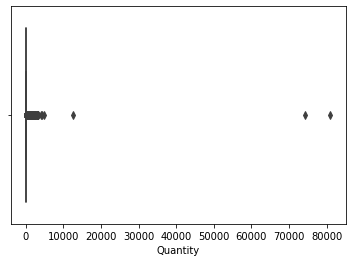

In [18]:
# Vẽ boxplot cho dữ liệu ở cột "Quantity"
sns.boxplot(x = df1.Quantity)

In [19]:
# Xoá dữ liệu ngoại lai bằng IQR Score
Q1 = df1.Quantity.quantile(0.25)
Q3 = df1.Quantity.quantile(0.75)
IQR = Q3 - Q1

In [20]:
# Xác định phần tử không phải ngoại lai
df6 = df1[~((df1.Quantity < (Q1 - 1.5*IQR)) | (df1.Quantity > (Q3 + 1.5*IQR)))]

<AxesSubplot:xlabel='Quantity'>

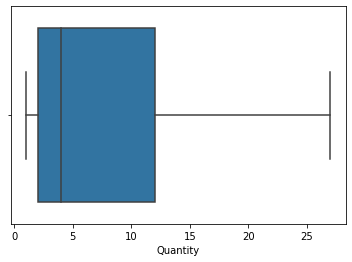

In [21]:
# Vẽ box plot cho dữ liệu ở cột "Quantity"
sns.boxplot(x = df6.Quantity)

# 5. Chuẩn hoá dữ liệu

<AxesSubplot:xlabel='Quantity'>

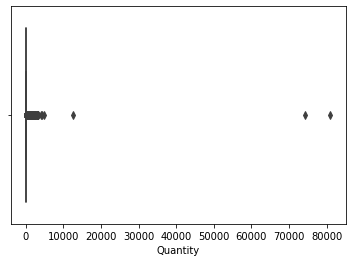

In [22]:
# Vẽ biểu đồ boxplot cho cột "Quantity"
sns.boxplot(x = df1.Quantity)

In [23]:
# Mô tả dữ liệu
df1.Quantity.describe()

count    397924.000000
mean         13.021823
std         180.420210
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

5.1. Chuẩn hoá dữ liệu bằng Min-Max Scaling

In [24]:
scaler = MinMaxScaler()

# Chuẩn hoá dữ liệu cho cột "Quantity"
df_s = scaler.fit_transform(df1[["Quantity"]])

In [25]:
# Mô tả dữ liệu sau chuẩn hoá
pd.DataFrame(df_s).describe()

,0,1
count,397924.000000,397924.000000
mean,0.000148,0.000383
std,0.002228,0.002714
min,0.000000,0.000000
25%,0.000012,0.000154
50%,0.000062,0.000239
75%,0.000136,0.000461
max,1.000000,1.000000


<AxesSubplot:>

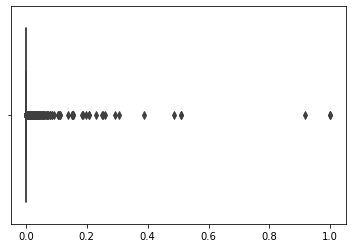

In [26]:
# Vẽ lại biểu đồ hộp
sns.boxplot(x = df_s)

5.2. Chuẩn hoá dữ liệu bằng Robust Scaling

In [28]:
scaler = RobustScaler()

# Chuẩn hoá dữ liệu ở cột "Quantity"
df_s = scaler.fit_transform(df1[["Quantity"]])

In [29]:
# Mô tả dữ liệu sau chuẩn hoá
pd.DataFrame(df_s).describe()

,0
count,397924.000000
mean,0.702182
std,18.042021
min,-0.500000
25%,-0.400000
50%,0.000000
75%,0.600000
max,8098.900000


<AxesSubplot:>

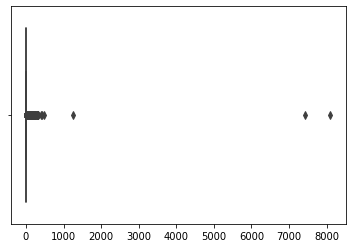

In [30]:
# Vẽ lại biểu đồ box plot
sns.boxplot(x = df_s)

5.3. Chuẩn hoá dữ liệu với Z-Score Scaling

In [31]:
scaler = StandardScaler()

# Chuẩn hoá dữ liệu ở cột Quantity
df_s = scaler.fit_transform(df1[["Quantity"]])

In [32]:
# Mô tả dữ liệu sau chuẩn hoá
pd.DataFrame(df_s).describe()

,0
count,3.979240e+05
mean,7.142497e-19
std,1.000001e+00
min,-6.663244e-02
25%,-6.108981e-02
50%,-3.891932e-02
75%,-5.663581e-03
max,4.488526e+02


<AxesSubplot:>

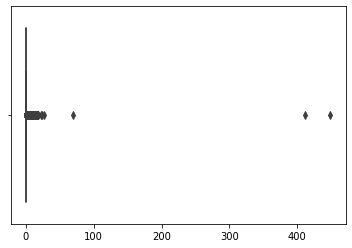

In [33]:
# Vẽ lại biểu đồ boxplot sau khi đã chuẩn hoá
sns.boxplot(x = df_s)

<AxesSubplot:ylabel='Density'>

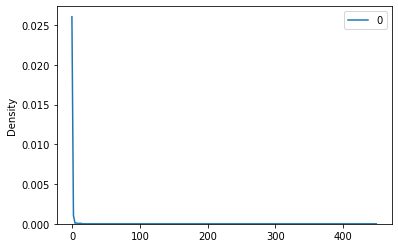

In [34]:
# Phân phối dữ liệu
sns.kdeplot(data = df_s)

# 6. Mã hoá dữ liệu

In [36]:
# In ra các giá trị ở cột Country
df1.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

6.1. Mã hoá cột "Country" với One-hot Encoder

In [38]:
# Sử dụng Scikit Learn
encoder = OneHotEncoder()

encodered_data = encoder.fit_transform(np.asarray(df1.Country).reshape(-1, 1))
encodered_data.todense()

matrix([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
# Sử dụng Pandas
pd.get_dummies(df1.Country)

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


6.2. Mã hoá cột "Country" với Label Encoder

In [40]:
# Sử dụng Scikit Learn
encoder = LabelEncoder()

encodered_data = encoder.fit_transform(np.asarray(df1.Country))
encodered_data

array([35, 35, 35, ..., 13, 13, 13])

In [41]:
# Sử dụng pandas
df1.Country.astype("category").cat.codes

0         35
1         35
2         35
3         35
4         35
          ..
541904    13
541905    13
541906    13
541907    13
541908    13
Length: 397924, dtype: int8

# 7. Rời rạc hoá dữ liệu

In [42]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


7.1. Rời rạc hoá dữ liệu ở cột UnitPrice

In [44]:
# Chia thành 4 khoảng giá trị có độ dài bằng nhau
cats = pd.cut(df1.UnitPrice, 4)
cats

0         (-8.143, 2035.688]
1         (-8.143, 2035.688]
2         (-8.143, 2035.688]
3         (-8.143, 2035.688]
4         (-8.143, 2035.688]
                 ...        
541904    (-8.143, 2035.688]
541905    (-8.143, 2035.688]
541906    (-8.143, 2035.688]
541907    (-8.143, 2035.688]
541908    (-8.143, 2035.688]
Name: UnitPrice, Length: 397924, dtype: category
Categories (4, interval[float64, right]): [(-8.143, 2035.688] < (2035.688, 4071.375] < (4071.375, 6107.062] < (6107.062, 8142.75]]

In [45]:
# Số lượng phần tử ở mỗi khoảng
pd.value_counts(cats)

(-8.143, 2035.688]      397915
(2035.688, 4071.375]         6
(4071.375, 6107.062]         2
(6107.062, 8142.75]          1
Name: UnitPrice, dtype: int64

In [46]:
# Chia thành 4 phần có số lượng phần tử tương đương nhau
cats = pd.cut(df1.UnitPrice, 4)
cats

0         (-8.143, 2035.688]
1         (-8.143, 2035.688]
2         (-8.143, 2035.688]
3         (-8.143, 2035.688]
4         (-8.143, 2035.688]
                 ...        
541904    (-8.143, 2035.688]
541905    (-8.143, 2035.688]
541906    (-8.143, 2035.688]
541907    (-8.143, 2035.688]
541908    (-8.143, 2035.688]
Name: UnitPrice, Length: 397924, dtype: category
Categories (4, interval[float64, right]): [(-8.143, 2035.688] < (2035.688, 4071.375] < (4071.375, 6107.062] < (6107.062, 8142.75]]

In [47]:
# Số lượng phần tử ở mỗi khoảng
pd.value_counts(cats)

(-8.143, 2035.688]      397915
(2035.688, 4071.375]         6
(4071.375, 6107.062]         2
(6107.062, 8142.75]          1
Name: UnitPrice, dtype: int64